- Import 12 files to 1 dataframe
- Save file to csv

In [32]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [33]:
path ='C:/Users/DUONG-PC/OneDrive/Desktop/Sales-Reporting-main/Sales-Reporting-main/data/'
dataframe = pd.read_csv(path + 'sales2019_1.csv')
frames=[]
for file in os.listdir(path): #  or.listdir() to pick the list path of files , loop to run all file
    if file.endswith('.csv'): # if to only pick file end with .csv
        filepath = path + file # merge path and file to have 'path to read'
        df1= pd.read_csv(filepath)
        frames.append(df1)
        df=pd.concat(frames,ignore_index=True,axis=0) # merge dataframe
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Colums:
1. OrderID: ID of order
2. Product: Product was sold in order
3. Quantity Ordered: Quantity of product in order
4. Price Each: unit price of product
5. Order Date: Date which customer order
6. Purchase Address: Address of customer

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"


EDA and clean Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [36]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [37]:
df.dropna(inplace= True)

In [38]:
df['Quantity Ordered'].value_counts()

1                   168552
2                    13324
3                     2920
4                      806
Quantity Ordered       355
5                      236
6                       80
7                       24
8                        5
9                        3
Name: Quantity Ordered, dtype: int64

In [39]:
df.drop(df[df['Quantity Ordered'] == 'Quantity Ordered'].index,inplace= True) # delete
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [40]:
df['Price Each'].unique()

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '150.0', '700.0', '600.0', '400.0', '300.0',
       '1700.0'], dtype=object)

In [41]:
#change type quantity ordered to int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='float')
#change type Price Each to float
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')

In [42]:
#change type Orderdate to datetime
df['Order Date']=pd.to_datetime(df['Order Date'])

In [43]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

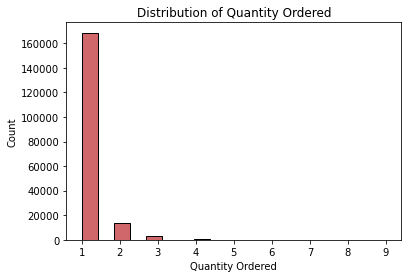

In [44]:
g=sns.histplot(data=df,x='Quantity Ordered')
sns.set_palette('RdBu')
g.set_title('Distribution of Quantity Ordered')
plt.show()


# 1.What was the best month for sales? how much was earned that month?

In [45]:
df['Month'] = df['Order Date'].dt.month

In [46]:
df['Month'].value_counts()

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

In [47]:
df['Revenue'] = df['Price Each']*df['Quantity Ordered']

In [48]:
moving_column=df.pop('Revenue')
df.insert(4,'Revenue',moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2.0,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1.0,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [49]:
month_revenue =df.groupby('Month')['Revenue'].sum().reset_index(name = 'Revenue') #convert groupby series to dataFrame
month_revenue

,Month,Revenue
0,1,1822256.75
1,2,2202022.50
2,3,2807100.25
3,4,3390670.25
4,5,3152606.75
5,6,2577802.25
6,7,2647775.75
7,8,2244467.75
8,9,2097560.00
9,10,3736726.75


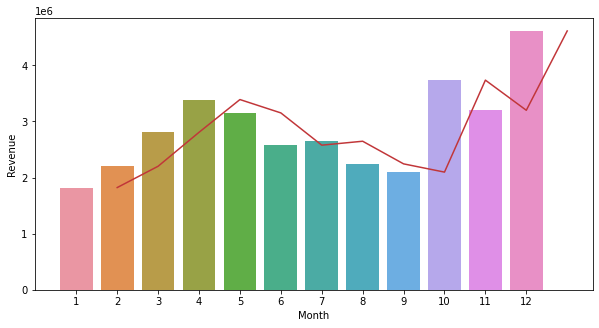

In [50]:

plt.figure(figsize = (10, 5))
sns.barplot(data=month_revenue,x='Month',y='Revenue',ci=None)
plt.xticks(rotation=0)
#ax2=ax1.twinx()
sns.lineplot(data=month_revenue,x='Month',y='Revenue')
plt.show()

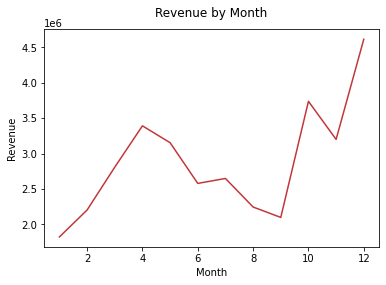

In [51]:
g=sns.lineplot(data=month_revenue,x='Month',y='Revenue',markers=True)
g.set_title('Revenue by Month',y=1.03)
plt.show()

In [82]:
fig = px.line(month_revenue, x="Month", y="Revenue", title="Revenue by Month",text="Revenue")
fig.update_traces(textposition="top center")
fig.show()


What Product was sold most?

In [52]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

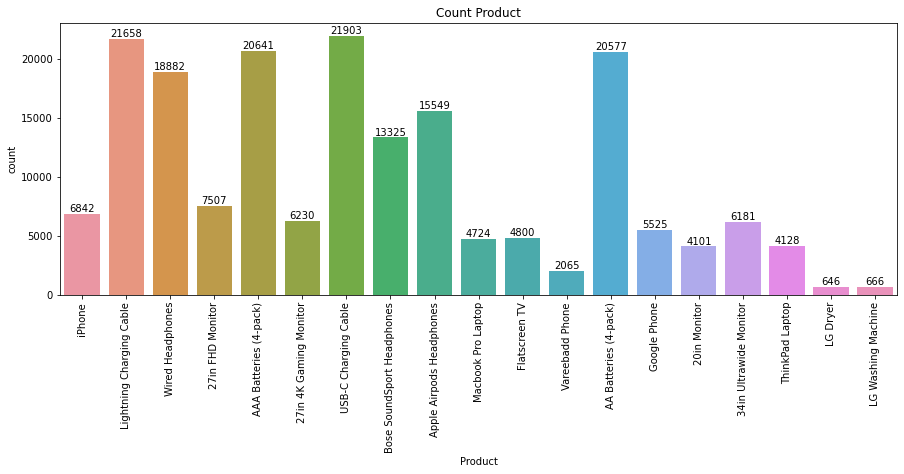

In [53]:
plt.figure(figsize = (15, 5))
ax=sns.countplot(data=df,x='Product')
for i in ax.containers:
    ax.bar_label(i,)
plt.xticks(rotation=90)
plt.title('Count Product')
plt.show()

What city has best sales?

In [54]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2.0,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1.0,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [55]:
df['city']=df['Purchase Address'].str.split(',').str.get(1) #get city from address

In [56]:
df_city=df.groupby('city')['Revenue'].sum().reset_index(name='Revenue')
df_city

,city,Revenue
0,Atlanta,2795498.50
1,Austin,1819581.75
2,Boston,3661642.00
3,Dallas,2767975.50
4,Los Angeles,5452571.00
5,New York City,4664317.50
6,Portland,2320490.50
7,San Francisco,8262204.00
8,Seattle,2747755.50


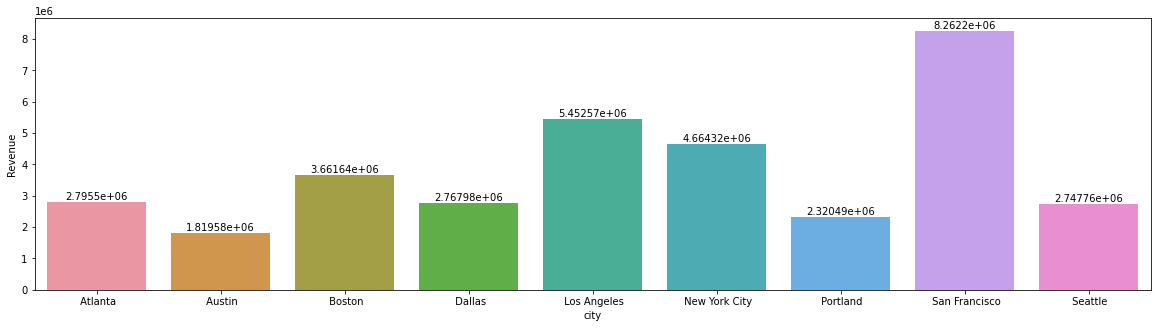

In [57]:
plt.figure(figsize = (20, 5))
ax=sns.barplot(data=df_city,x='city',y='Revenue',ci=None)
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i, )
plt.show()

In [73]:
# Test plotly library
fig = px.bar(df_city,x='city',y='Revenue',color='city',text_auto='0.2s',title="Revenue by City")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'})
fig.show()

What the most time did customer buy items to optimize ads?

In [ ]:
df['hour_ordered']=df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered
0,141234,iPhone,1.0,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston,21
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland,14
2,141236,Wired Headphones,2.0,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco,13
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,20
4,141238,Wired Headphones,1.0,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin,11


In [ ]:
''' old version add column season base on month
df['Month']=df['Month'].astype('str')
season =['Spring','Summer','Autumn','Winter']
Spring ='1|2|3'
Summer= '4|5|6'
Autumn = '7|8|9'
Winter = '10|11|12'
conditions = [(df['Month'].str.contains(Spring)),
                (df['Month'].str.contains(Summer)),
                (df['Month'].str.contains(Autumn)),
                (df['Month'].str.contains(Winter))]
df['Season'] = np.select(conditions,season,default='other')
df.tail()
'''

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered,Season
186845,259353,AAA Batteries (4-pack),3.0,2.99000,8.97000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,20,Autumn
186846,259354,iPhone,1.0,700.00000,700.00000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,16,Autumn
186847,259355,iPhone,1.0,700.00000,700.00000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,7,Autumn
186848,259356,34in Ultrawide Monitor,1.0,379.98999,379.98999,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,17,Autumn
186849,259357,USB-C Charging Cable,1.0,11.95000,11.95000,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9,San Francisco,0,Autumn


In [ ]:
# new version add season base on value in month
def label_race (row):
   if row['Month'] in range(1,4)  :
      return 'Spring'
   if row['Month'] in range(4,7) :
      return 'Summer'
   if row['Month'] in range (7,10) :
      return 'Autumn'
   if row['Month'] in range (10,13):
      return 'Winter'
   return 'Other'
df['Season'] = df.apply (lambda row: label_race(row), axis=1)

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered,Season
120275,195748,27in FHD Monitor,1.0,149.990005,149.990005,2019-06-01 03:26:00,"856 Elm St, San Francisco, CA 94016",6,San Francisco,3,Summer
120405,195869,AAA Batteries (4-pack),1.0,2.990000,2.990000,2019-06-01 01:06:00,"877 Center St, Dallas, TX 75001",6,Dallas,1,Summer
120619,196072,Lightning Charging Cable,1.0,14.950000,14.950000,2019-06-01 00:18:00,"594 Willow St, San Francisco, CA 94016",6,San Francisco,0,Summer
120682,196132,Lightning Charging Cable,1.0,14.950000,14.950000,2019-06-01 02:48:00,"998 10th St, San Francisco, CA 94016",6,San Francisco,2,Summer
121209,196638,Vareebadd Phone,1.0,400.000000,400.000000,2019-06-01 01:51:00,"612 North St, Atlanta, GA 30301",6,Atlanta,1,Summer
...,...,...,...,...,...,...,...,...,...,...,...
148777,222905,AAA Batteries (4-pack),1.0,2.990000,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston,19,Summer
148778,222906,27in FHD Monitor,1.0,149.990005,149.990005,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City,19,Summer
148779,222907,USB-C Charging Cable,1.0,11.950000,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,18,Summer
148780,222908,USB-C Charging Cable,1.0,11.950000,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco,18,Summer


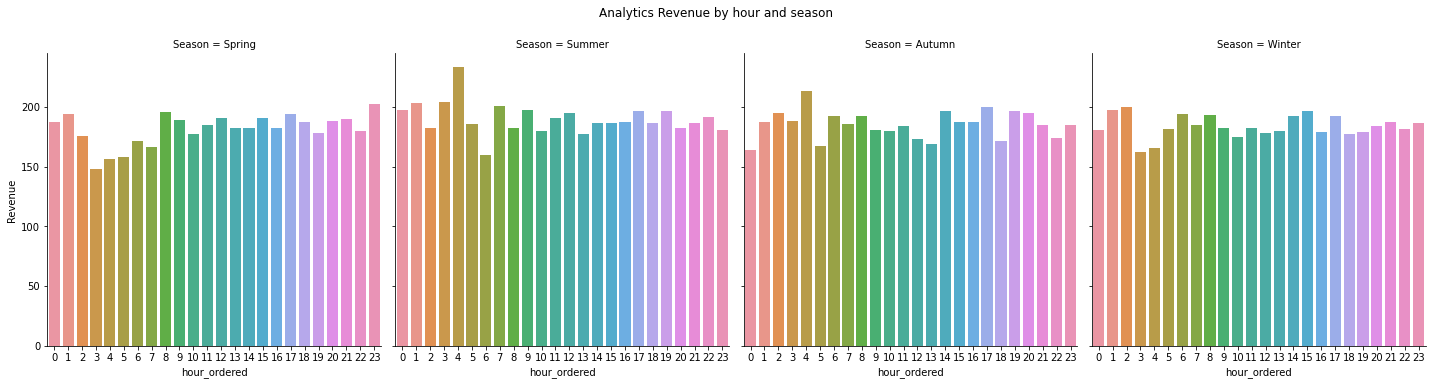

In [ ]:
ax=sns.catplot(data=df,x='hour_ordered',y='Revenue',col='Season',kind='bar',ci=None,col_order=['Spring','Summer','Autumn','Winter'])
ax.fig.suptitle('Analytics Revenue by hour and season',y=1.06)
plt.show()

What products are most often sold togerther?

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered,Season
0,141234,iPhone,1.0,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston,21,Spring
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland,14,Spring
2,141236,Wired Headphones,2.0,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco,13,Spring
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,20,Spring
4,141238,Wired Headphones,1.0,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin,11,Spring


In [ ]:
df_dupid=df[df['Order ID'].duplicated(keep = False)] # sort row id duplicate
df_dupid.head()

,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered,Season
41,141275,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin,16,Spring
42,141275,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin,16,Spring
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles,8,Spring
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles,8,Spring
133,141365,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City,11,Spring


In [ ]:
groupproduct = lambda product: ', '.join(product) # create funtion join product equal ","
df_dupid['all product']=df_dupid.groupby('Order ID')['Product'].transform(groupproduct)
df_dupid

C:\Users\DUONG-PC\AppData\Local\Temp\ipykernel_10444\2366243904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dupid['all product']=df_dupid.groupby('Order ID')['Product'].transform(groupproduct)


,Order ID,Product,Quantity Ordered,Price Each,Revenue,Order Date,Purchase Address,Month,city,hour_ordered,Season,all product
41,141275,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin,16,Spring,"USB-C Charging Cable, Wired Headphones"
42,141275,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin,16,Spring,"USB-C Charging Cable, Wired Headphones"
57,141290,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles,8,Spring,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles,8,Spring,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City,11,Spring,"Vareebadd Phone, Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,Atlanta,20,Autumn,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,Wired Headphones,1.0,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,0,Autumn,"Wired Headphones, AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2.0,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,Atlanta,0,Autumn,"Wired Headphones, AAA Batteries (4-pack)"
186841,259350,Google Phone,1.0,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,San Francisco,13,Autumn,"Google Phone, USB-C Charging Cable"


In [ ]:
df_no_dup=df_dupid[['Order ID','all product']].drop_duplicates()
df_no_dup['all product'].value_counts()

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
                                                       ... 
Vareebadd Phone, Wired Headphones, iPhone                 1
Google Phone, Wired Headphones, USB-C Charging Cable      1
LG Washing Machine, Wired Headphones                      1
LG Washing Machine, Google Phone                          1
LG Washing Machine, AA Batteries (4-pack)                 1
Name: all product, Length: 366, dtype: int64

Solution 2: convert directly group by to dataframe and count value

In [ ]:
#groupproduct = lambda product: ', '.join(product) # create funtion join product equal ","
df2=df_dupid.groupby('Order ID')['Product'].apply(', '.join).reset_index(name='All Product')
df2['All Product'].value_counts()

iPhone, Lightning Charging Cable                                                  882
Google Phone, USB-C Charging Cable                                                856
iPhone, Wired Headphones                                                          361
Vareebadd Phone, USB-C Charging Cable                                             312
Google Phone, Wired Headphones                                                    303
                                                                                 ... 
Google Phone, USB-C Charging Cable, USB-C Charging Cable                            1
ThinkPad Laptop, 27in 4K Gaming Monitor                                             1
iPhone, Google Phone                                                                1
Vareebadd Phone, 27in FHD Monitor                                                   1
Google Phone, USB-C Charging Cable, Wired Headphones, Apple Airpods Headphones      1
Name: All Product, Length: 366, dtype: int64